<a href="https://colab.research.google.com/github/bhattronak1/ML-Tensorflow-project/blob/main/Copy_of_Copy_of_MPG__regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

In [ ]:
from __future__ import division, absolute_import, print_function
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print( tf.__version__)

2.4.0


In [ ]:
dataset_path= keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names=['MPG','CYL','Displacement','Hoursepower','Weight','Accelearation','Model Year','Origin']
raw_data = pd.read_csv( dataset_path, names= column_names, na_values='?', comment='\t', sep=" ", skipinitialspace=True)
dataset = raw_data.copy()
dataset.tail()


,MPG,CYL,Displacement,Hoursepower,Weight,Accelearation,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.isna().sum()

MPG              0
CYL              0
Displacement     0
Hoursepower      6
Weight           0
Accelearation    0
Model Year       0
Origin           0
dtype: int64

In [ ]:
dataset= dataset.dropna()

In [ ]:
origin= dataset.pop("Origin")

In [ ]:
dataset["USA"]= (origin==1)*1.0
dataset["Europe"]=(origin==2)*1.0
dataset["Japan"]=(origin==3)*1.0
dataset.tail()

,MPG,CYL,Displacement,Hoursepower,Weight,Accelearation,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [ ]:
train_dataset= dataset.sample(frac=0.8, random_state=0)
test_dataset= dataset.drop(train_dataset.index)

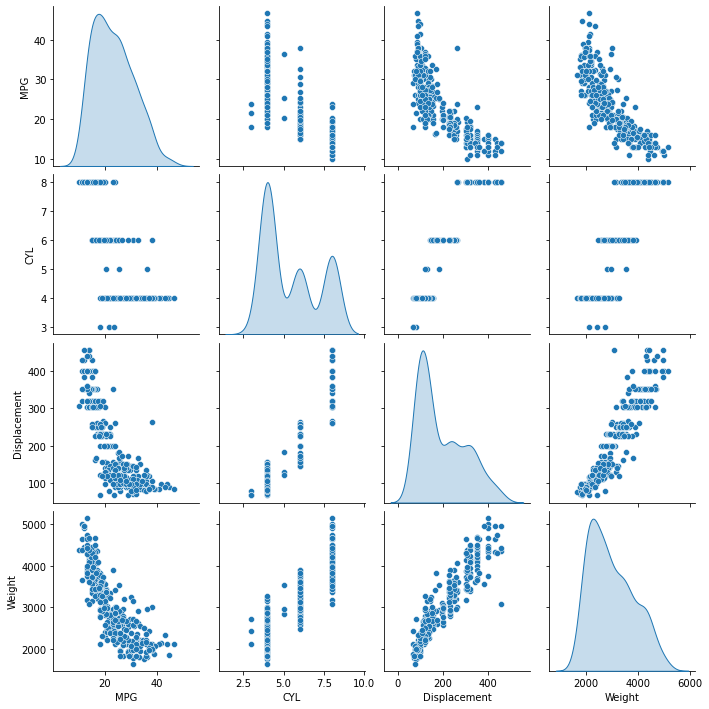

In [ ]:
sns.pairplot(train_dataset[['MPG', 'CYL', 'Displacement', 'Weight']], diag_kind="kde")

In [ ]:
train_stat= train_dataset.describe()
train_stat.pop("MPG")
train_stat= train_stat.transpose()
train_stat

,count,mean,std,min,25%,50%,75%,max
CYL,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Hoursepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Accelearation,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [ ]:
train_label= train_dataset.pop('MPG')
test_label= test_dataset.pop('MPG')

In [ ]:
def norm(x):
  return (x-train_stat['mean'])/train_stat['std']

norm_train_dataset= norm(train_dataset)
norm_test_dataset= norm(test_dataset)

In [ ]:
def build_model():
  model= keras.Sequential([
          layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
          layers.Dense(64, activation=tf.nn.relu),
          layers.Dense(1)
  ])

  optimizer= tf. keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])

  return model

  

In [ ]:
model=build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS= 1000

history = model.fit(norm_train_dataset, train_label, epochs= EPOCHS,validation_split=0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist=pd.DataFrame(history.history)
hist['epoch']= history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.398247,0.726037,1.398247,10.253823,2.465808,10.253823,995
996,1.587200,0.745447,1.587200,9.907812,2.326156,9.907812,996
997,1.334214,0.714208,1.334214,11.787186,2.356809,11.787186,997
998,1.777277,0.844182,1.777277,9.543533,2.269154,9.543533,998
999,1.427249,0.693187,1.427249,9.697791,2.374118,9.697791,999


In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel(' MAE [MPG]')

  plt.plot(hist['epoch'], hist['mae'], label='Train error')

  plt.plot(hist['epoch'], hist['val_mae'], label=' Val error')

  plt.legend()
  plt.ylim([0,5])

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel(' MSE [MPG]')

  plt.plot(hist['epoch'], hist['mse'], label='Train error')

  plt.plot(hist['epoch'], hist['val_mse'], label=' Val error')

  plt.legend()
  plt.ylim([0,20])


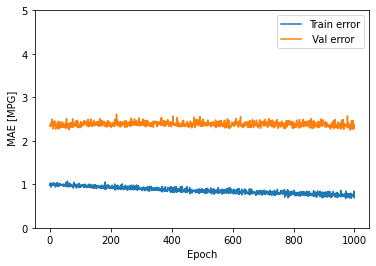

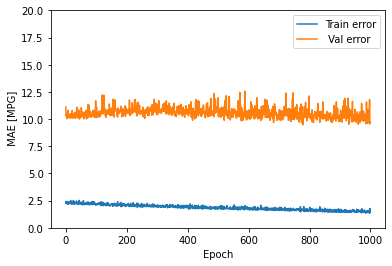

In [ ]:
plot_history(history)


........................................................................

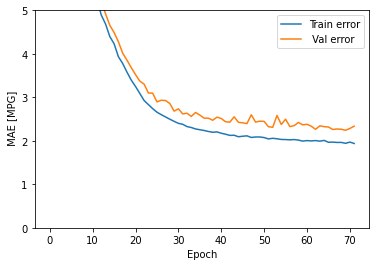

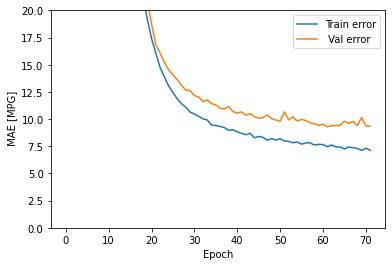

In [ ]:
model=build_model()

early_stopping= keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history= model.fit(norm_train_dataset, train_label, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stopping, PrintDot()])

plot_history(history)


In [ ]:
loss,mae,mse= model.evaluate(norm_test_dataset, test_label, verbose=0)
print("Testing set Mean Abs Erros:{:5.2f} MPG". format(mae))

Testing set Mean Abs Erros: 2.10 MPG


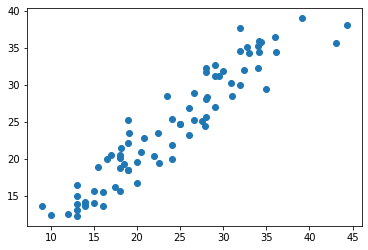

In [ ]:
test_predictions= model.predict(norm_test_dataset).flatten()

plt.scatter(test_label, test_predictions)

(array([ 2.,  1.,  3., 10.,  8., 20., 14., 12.,  5.,  3.]),
 array([-7.37947617, -6.01250118, -4.6455262 , -3.27855122, -1.91157623,
        -0.54460125,  0.82237373,  2.18934872,  3.5563237 ,  4.92329868,
         6.29027367]),
 <a list of 10 Patch objects>)

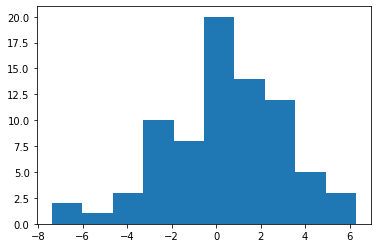

In [ ]:
error= test_predictions - test_label
plt.hist(error)